In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Importing the libraries
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Building a Function to import the data
Data = []
directory = '/content/drive/MyDrive/ColabNotebooks/Data1/FxR'
img_size = 64
#“angry (0)”, “disgust (1)”, “fear (2)”, “happy (3)”, “sad (4)”, “surprise (5)”, or “neutral (6)”
Classes = ['0','1','2','3','4','5','6']

def create_Data():
    for category in Classes:
      path = os.path.join(directory, category)
      label = Classes.index(category)
      for img in os.listdir(path):
          try:
              img_array = cv2.imread(os.path.join(path, img))
              features = cv2.resize(img_array, (img_size , img_size))
              Data.append([features, label])
          except Exception as e:
              pass

In [4]:
 #Calling the function to load data
create_Data()

In [14]:
#Separating the data into X (images) and y (labels)
X = []
y= []
for features,label in Data:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, img_size,img_size, 3)
y = np.array(y)
X.shape

(26195, 64, 64, 3)

In [15]:
# Split your data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Normalizing the data
X_train_scaled = X_train / 255
X_test_scaled = X_test/255
X_train_scaled[0]

array([[[0.20784314, 0.15686275, 0.1254902 ],
        [0.21176471, 0.15294118, 0.12941176],
        [0.21568627, 0.15294118, 0.12941176],
        ...,
        [0.18431373, 0.13333333, 0.10980392],
        [0.18823529, 0.13333333, 0.10980392],
        [0.18431373, 0.12941176, 0.10588235]],

       [[0.20784314, 0.15686275, 0.1254902 ],
        [0.20784314, 0.15294118, 0.12941176],
        [0.21176471, 0.15294118, 0.12941176],
        ...,
        [0.18039216, 0.1254902 , 0.10196078],
        [0.19607843, 0.14117647, 0.11764706],
        [0.19215686, 0.12941176, 0.10588235]],

       [[0.21176471, 0.15686275, 0.1254902 ],
        [0.20784314, 0.15686275, 0.12941176],
        [0.20784314, 0.15294118, 0.12941176],
        ...,
        [0.18823529, 0.1372549 , 0.11372549],
        [0.18431373, 0.1254902 , 0.10588235],
        [0.19215686, 0.1254902 , 0.10588235]],

       ...,

       [[0.49019608, 0.74117647, 0.8627451 ],
        [0.50980392, 0.75686275, 0.87843137],
        [0.51764706, 0

In [18]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

#Building a model
cnn = models.Sequential([
    layers.Conv2D(filters = 20, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 35, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters = 35, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(7, activation= 'softmax')
])



In [19]:
#Compiling the model
cnn.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [20]:
#training the model
cnn.fit(X_train_scaled, y_train, epochs =10)

Epoch 1/10
655/655 [==============================] - 21s 8ms/step - loss: 1.2990 - accuracy: 0.4628
Epoch 2/10
655/655 [==============================] - 3s 5ms/step - loss: 1.0508 - accuracy: 0.5789
Epoch 3/10
655/655 [==============================] - 3s 5ms/step - loss: 0.9614 - accuracy: 0.6211
Epoch 4/10
655/655 [==============================] - 3s 5ms/step - loss: 0.9015 - accuracy: 0.6436
Epoch 5/10
655/655 [==============================] - 4s 6ms/step - loss: 0.8560 - accuracy: 0.6617
Epoch 6/10
655/655 [==============================] - 3s 5ms/step - loss: 0.8018 - accuracy: 0.6883
Epoch 7/10
655/655 [==============================] - 3s 5ms/step - loss: 0.7545 - accuracy: 0.7073
Epoch 8/10
655/655 [==============================] - 3s 5ms/step - loss: 0.7114 - accuracy: 0.7257
Epoch 9/10
655/655 [==============================] - 4s 6ms/step - loss: 0.6619 - accuracy: 0.7466
Epoch 10/10
655/655 [==============================] - 3s 5ms/step - loss: 0.6093 - accuracy: 0.767

In [44]:
#Predictions using the model
y_p = cnn.predict(X_test_scaled)
y_pred =[np.argmax(x) for x in y_p]

164/164 [==============================] - 0s 2ms/step


3


3

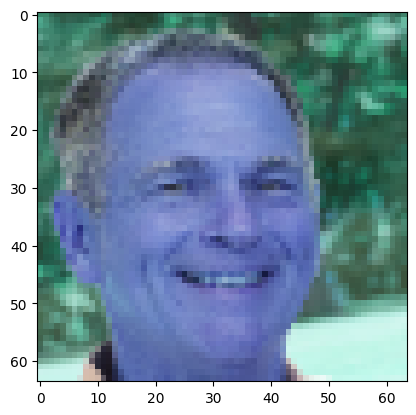

In [37]:
#Testing the model
k = 178
plt.imshow(X_test[k])
print(np.argmax(y_p[k]))
y_test[k]

In [38]:
#Evaluating the model
cnn.evaluate(X_test_scaled, y_test)

164/164 [==============================] - 1s 4ms/step - loss: 1.0807 - accuracy: 0.6142


[1.0806858539581299, 0.6142393350601196]

In [47]:
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.43      0.59      0.50       635
           1       0.43      0.43      0.43       521
           2       0.45      0.41      0.43       620
           3       0.91      0.83      0.87      1028
           4       0.46      0.44      0.45       621
           5       0.52      0.43      0.47       778
           6       0.82      0.87      0.84      1036

    accuracy                           0.61      5239
   macro avg       0.57      0.57      0.57      5239
weighted avg       0.62      0.61      0.61      5239

